<h2><center>Описание</center></h2>

Документ Data_3 содержит следующие столбцы:
- conversion_unique_id - уникальный идентификатор установки (юзера).
- publisher_id - источник (рекламная сеть), который привлек юзера в игру
- user_agent - агрегированная информация об устройстве (мобильном девайсе), на котором была произведена установка приложения
- location_country_name - страна, в которой находится юзер, установивший игру
- network_type - канал подключения к интернету (мобильный/wifi) \
- device_model - модель устройства (мобильного девайса), с которого была произведена установка приложения
- device_os_version - версия ОС устройства (мобильного девайса), с которого была произведена установка приложения
- app_version - версия установленного приложения.

<h2><center>Задание</center></h2>

В данном наборе данных присутствуют фродовые конверсии,
имеющие аномалии в "железе". Найдите все возможные аномалии, опишите свое
решение.


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data3 = pd.read_excel("Data_3 (+).xlsx") #, index_col = "conversion_unique_id"

In [3]:
data3.head()

,conversion_unique_id,user_agent,location_country_name,network_type,device_model,device_os_version,app_version,offer_id,publisher_id,sub_publisher_id,campaign_id,sub_sub_publisher_id
0,00083f66929450e0163dbe669912c4fd1ad9cc20,Dalvik/1.6.0 (Linux; U; Android 4.1.1; BQS-502...,0,Cable/DSL,BQS-5020,4.1.1,5.7.0,APP_1,Pub_1,32976513,5552,f_28
1,001d9672c1cbe703d8162e56d6f46a22a88e52c3,Dalvik/1.6.0 (Linux; U; Android 4.1.1; SM-J510...,Russia,Cellular,SM-J510H,4.1.1,5.7.0,APP_1,Pub_2,1102,Celevie_geo,35206686
2,0036f0aca11cfa97771ed7f46520e2e2b09f9826,Dalvik/1.6.0 (Linux; U; Android 4.1.1; Redmi 4...,Russia,Cable/DSL,Redmi4A,4.1.1,5.7.0,APP_1,Pub_1,32976306,5506,u_0
3,003fdd5202441662b181599c8a7a615b7994b10b,Dalvik/1.6.0 (Linux; U; Android 4.1.1; Surfer ...,Russia,Cable/DSL,Surfer7.323G,4.1.1,5.7.0,APP_1,Pub_1,34861865,5549,u_0
4,0040b6982d374724b06e3529fd91cc374fc6d337,Dalvik/2.1.0 (Linux; U; Android 8.1.0; COL-L29...,Russia,Cellular,COL-L29,0,5.7.0,APP_1,Pub_1,34713674,104,m_20


In [4]:
data3.shape

(11703, 12)

In [5]:
# ad_columns = list(data3.columns[-6:])

In [6]:
for column in data3.columns:
    print(data3[column].value_counts())
    print('-'*50)

10f8331dc42fc37ead115633471674b8277a43a7    1
473edff6564ba111e7f3f992b2bf7cdbb9f1c055    1
c6806ed3b36729f6fbc3466b2c8155914c4deb70    1
d46e2866bfffa2a3044c9423504225fa6636593b    1
5dde067f0dca49591c3f3f22bf35f84be52ad4e1    1
                                           ..
585a3c345702e68e13a87dfc75f404627dec5bdd    1
4d4fb0f4015184ad6a638dbcbe4b19a4b36de1bb    1
18883deb9e3b150acfeea325c6961d3b1078a1bd    1
16ee5d24a9a15ecb10e73fc1271fd6496148f66d    1
e029a02c6420e50936dac0cd23cbefbcb621e764    1
Name: conversion_unique_id, Length: 11703, dtype: int64
--------------------------------------------------
Dalvik/1.6.0 (Linux; U; Android 4.1.1; Redmi Note 4 Build/Redmi Note 4)          232
Dalvik/1.6.0 (Linux; U; Android 4.1.1; Redmi 4X Build/Redmi 4X)                  190
Dalvik/2.1.0 (Linux; U; Android 8.0.0; LLD-L31 Build/HONORLLD-L31)               123
Dalvik/1.6.0 (Linux; U; Android 4.1.1; SM-A520F Build/SM-A520F)                  120
Dalvik/1.6.0 (Linux; U; Android 4.1.1; Redmi 4A

In [7]:
# data3[ad_columns]

In [8]:
data3.describe()

,conversion_unique_id,user_agent,location_country_name,network_type,device_model,device_os_version,app_version,offer_id,publisher_id,sub_publisher_id,campaign_id,sub_sub_publisher_id
count,11703,11703,11703,11703,11703,11703,11703,11703,11703,11703,11703,11703
unique,11703,2829,33,4,1977,16,5,1,4,699,88,882
top,10f8331dc42fc37ead115633471674b8277a43a7,Dalvik/1.6.0 (Linux; U; Android 4.1.1; Redmi N...,Russia,Cable/DSL,RedmiNote4,4.1.1,5.7.0,APP_1,Pub_1,1285,5506,u_0
freq,1,232,11151,7805,316,6836,11620,11703,9807,817,1857,2428


Предположения:
- У ботов будут в определённых связанные с рекламной кампанией будет преобладать конкретный user_agent 
- Боты будут использовать тип связи "Cable/DSL", если только они не способны его изменять, но без понятия как это проверить

In [9]:
data3.network_type.value_counts()

Cable/DSL    7805
Cellular     3794
0             100
Dialup          4
Name: network_type, dtype: int64

In [10]:
data3.sub_sub_publisher_id.value_counts()[:10]

u_0     2428
m_0      391
f_0      296
m_28     191
m_30     174
m_31     162
m_21     160
m_20     156
m_29     156
m_33     155
Name: sub_sub_publisher_id, dtype: int64

In [11]:
data3.campaign_id.value_counts()[:10]

5506           1857
Celevie_geo    1113
70              850
53              642
5560            495
134             432
MSK_SPB         347
42              316
5529            270
7               269
Name: campaign_id, dtype: int64

In [12]:
!pip install Wordcloud

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Глянем самые популярные девайсы

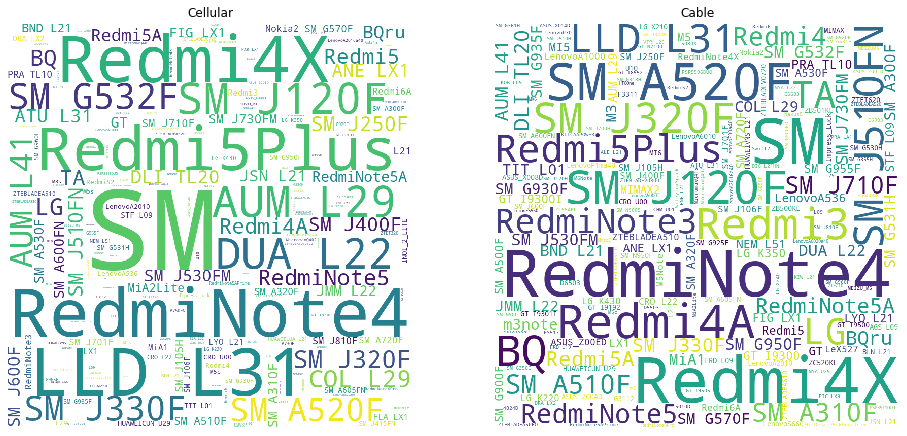

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(16,32))
phones_cellular = data3[data3['network_type'] == 'Cellular']['device_model']
phones_cable =data3[data3['network_type'] == 'Cable/DSL']['device_model']
wordcloud1 = WordCloud(background_color='white',width=800, height=800).generate(' '.join(phones_cellular))
wordcloud2 = WordCloud(background_color='white',width=800, height=800).generate(' '.join(phones_cable))
ax[0].imshow(wordcloud1)
ax[0].axis('off')
ax[0].set_title('Cellular')
ax[1].imshow(wordcloud2)
ax[1].axis('off')
ax[1].set_title('Cable')
plt.show()

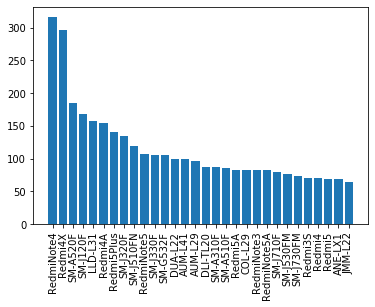

In [15]:
phones = pd.DataFrame(data3['device_model'].value_counts()[:30])
plt.bar(phones.index, phones.device_model)
plt.xticks(rotation=90);

Попробуем проверить, если такие когорты, в которых доминируют определённые устройства

Сгрупируем таблицу по publisher_id и sub_sub_publisher_id и посмотрим процент уникальных агентов

In [16]:
data3['device_model_1'] = data3['device_model']

In [17]:
data3.head()

,conversion_unique_id,user_agent,location_country_name,network_type,device_model,device_os_version,app_version,offer_id,publisher_id,sub_publisher_id,campaign_id,sub_sub_publisher_id,device_model_1
0,00083f66929450e0163dbe669912c4fd1ad9cc20,Dalvik/1.6.0 (Linux; U; Android 4.1.1; BQS-502...,0,Cable/DSL,BQS-5020,4.1.1,5.7.0,APP_1,Pub_1,32976513,5552,f_28,BQS-5020
1,001d9672c1cbe703d8162e56d6f46a22a88e52c3,Dalvik/1.6.0 (Linux; U; Android 4.1.1; SM-J510...,Russia,Cellular,SM-J510H,4.1.1,5.7.0,APP_1,Pub_2,1102,Celevie_geo,35206686,SM-J510H
2,0036f0aca11cfa97771ed7f46520e2e2b09f9826,Dalvik/1.6.0 (Linux; U; Android 4.1.1; Redmi 4...,Russia,Cable/DSL,Redmi4A,4.1.1,5.7.0,APP_1,Pub_1,32976306,5506,u_0,Redmi4A
3,003fdd5202441662b181599c8a7a615b7994b10b,Dalvik/1.6.0 (Linux; U; Android 4.1.1; Surfer ...,Russia,Cable/DSL,Surfer7.323G,4.1.1,5.7.0,APP_1,Pub_1,34861865,5549,u_0,Surfer7.323G
4,0040b6982d374724b06e3529fd91cc374fc6d337,Dalvik/2.1.0 (Linux; U; Android 8.1.0; COL-L29...,Russia,Cellular,COL-L29,0,5.7.0,APP_1,Pub_1,34713674,104,m_20,COL-L29


In [18]:
data3['user_agent_1'] = data3['user_agent']

In [19]:
agent = data3.groupby(['publisher_id', 'sub_sub_publisher_id']).aggregate({'user_agent': 'nunique', 'user_agent_1':'count'})

In [20]:
agent

user_agent  user_agent_1
publisher_id sub_sub_publisher_id                          
Pub_1        f_0                          210           296
             f_20                          84            95
             f_21                          64            76
             f_22                          70            79
             f_23                          87            95
...                                       ...           ...
Pub_4        m_64                           1             1
             m_66                           2             2
             m_73                           1             1
             m_75                           5             5
             u_46                           1             1

[961 rows x 2 columns]

In [21]:
agent = agent.rename(columns = {'user_agent':'num_unique_agents', 'user_agent_1':'num_agents'})

In [22]:
agent['percent_unique'] = agent['num_unique_agents']/agent['num_agents']

In [23]:
for column in agent.columns:
    print(column, agent[column].mean())
    

num_unique_agents 9.699271592091572
num_agents 12.177939646201873
percent_unique 0.9861564198313436


In [24]:
agent = agent.sort_values('percent_unique')

In [25]:
agent

num_unique_agents  num_agents  \
publisher_id sub_sub_publisher_id                                  
Pub_1        u_0                                1157        2428   
Pub_4        f_22                                  2           3   
Pub_2        35078510                              2           3   
             34535845                              2           3   
Pub_4        0                                    62          92   
...                                              ...         ...   
Pub_2        34599859                              1           1   
             34599860                              1           1   
             34599889                              1           1   
             34599797                              1           1   
Pub_4        u_46                                  1           1   

                                   percent_unique  
publisher_id sub_sub_publisher_id                  
Pub_1        u_0                         0.476524  
Pub_4        f_22                        0.666667  
Pub_2        35078510                    0.666667  
             34535845                    0.666667  
Pub_4        0                           0.673913  
...                                           ...  
Pub_2        34599859                    1.000000  
             34599860                    1.000000  
             34599889                    1.000000  
             34599797                    1.000000  
Pub_4        u_46                        1.000000  

[961 rows x 3 columns]

In [26]:
agent.sort_values('num_agents')

num_unique_agents  num_agents  \
publisher_id sub_sub_publisher_id                                  
Pub_2        35083971                              1           1   
             33670595                              1           1   
             34220215                              1           1   
             34220321                              1           1   
             34220398                              1           1   
...                                              ...         ...   
Pub_1        m_30                                130         165   
             m_28                                144         186   
             f_0                                 210         296   
             m_0                                 281         391   
             u_0                                1157        2428   

                                   percent_unique  
publisher_id sub_sub_publisher_id                  
Pub_2        35083971                    1.000000  
             33670595                    1.000000  
             34220215                    1.000000  
             34220321                    1.000000  
             34220398                    1.000000  
...                                           ...  
Pub_1        m_30                        0.787879  
             m_28                        0.774194  
             f_0                         0.709459  
             m_0                         0.718670  
             u_0                         0.476524  

[961 rows x 3 columns]

In [27]:
agent.sort_values('num_unique_agents')

num_unique_agents  num_agents  \
publisher_id sub_sub_publisher_id                                  
Pub_2        35083971                              1           1   
             33670595                              1           1   
             34220215                              1           1   
             34220321                              1           1   
             34220398                              1           1   
...                                              ...         ...   
Pub_1        m_30                                130         165   
             m_28                                144         186   
             f_0                                 210         296   
             m_0                                 281         391   
             u_0                                1157        2428   

                                   percent_unique  
publisher_id sub_sub_publisher_id                  
Pub_2        35083971                    1.000000  
             33670595                    1.000000  
             34220215                    1.000000  
             34220321                    1.000000  
             34220398                    1.000000  
...                                           ...  
Pub_1        m_30                        0.787879  
             m_28                        0.774194  
             f_0                         0.709459  
             m_0                         0.718670  
             u_0                         0.476524  

[961 rows x 3 columns]

In [28]:
agent

num_unique_agents  num_agents  \
publisher_id sub_sub_publisher_id                                  
Pub_1        u_0                                1157        2428   
Pub_4        f_22                                  2           3   
Pub_2        35078510                              2           3   
             34535845                              2           3   
Pub_4        0                                    62          92   
...                                              ...         ...   
Pub_2        34599859                              1           1   
             34599860                              1           1   
             34599889                              1           1   
             34599797                              1           1   
Pub_4        u_46                                  1           1   

                                   percent_unique  
publisher_id sub_sub_publisher_id                  
Pub_1        u_0                         0.476524  
Pub_4        f_22                        0.666667  
Pub_2        35078510                    0.666667  
             34535845                    0.666667  
Pub_4        0                           0.673913  
...                                           ...  
Pub_2        34599859                    1.000000  
             34599860                    1.000000  
             34599889                    1.000000  
             34599797                    1.000000  
Pub_4        u_46                        1.000000  

[961 rows x 3 columns]

Видим sub_sub_publisher_id с названием u_0, у которого только половина устройств уникально

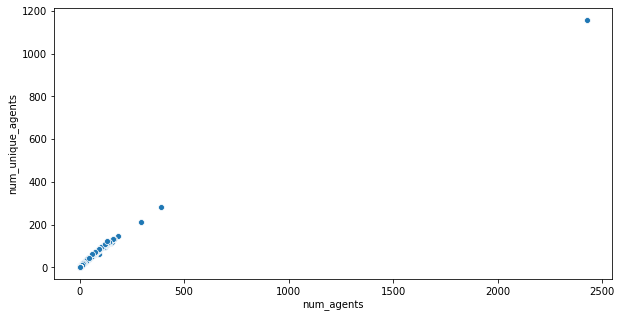

In [29]:
plt.figure(figsize=(10,5)) #чтобы не мучать глазки
sns.scatterplot(y = agent['num_unique_agents'], 
                x = agent['num_agents'], alpha = 1)

In [32]:
data3[data3['sub_sub_publisher_id'] == 'u_0']['device_model'].value_counts()[:50]

RedmiNote4     85
Redmi4X        72
RedmiNote5     50
Redmi5Plus     46
Redmi4A        42
SM-J120F       31
Redmi5A        29
SM-A520F       26
Redmi3S        22
RedmiNote3     22
RedmiNote5A    20
MiA1           19
LLD-L31        16
SM-J320F       16
Redmi5         16
Redmi4         15
SM-A510F       15
Redmi6A        14
SM-J710F       14
SM-J400F       14
SM-J510FN      14
SM-J330F       13
RedmiS2        13
SM-A310F       13
SM-G950F       13
GT-I9300I      13
SM-A720F       12
AUM-L41        12
ANE-LX1        12
DLI-TL20       11
SM-G955F       11
SM-G570F       11
SM-J106F       10
SM-G900F       10
CRO-L22        10
SM-J730FM      10
SM-J105H       10
MIMAX2         10
M5Note          9
GT-I9300        9
BND-L21         9
RedmiNote4X     9
FIG-LX1         9
MI5             8
MI6             8
M3s             8
ASUS_X008D      8
SM-G935F        8
SM-A300F        8
JMM-L22         8
Name: device_model, dtype: int64

In [33]:
devices = data3.groupby(['publisher_id', 'campaign_id']).aggregate({'device_model': 'nunique', 'device_model_1':'count'}).sort_values('device_model')

In [34]:
devices = devices.rename(columns = {'device_model':'unique_device_models', 'device_model_1':'num_device_models'})

In [35]:
devices['percent'] = devices['unique_device_models']/devices['num_device_models']

In [36]:
devices

unique_device_models  num_device_models  \
publisher_id campaign_id                                                  
Pub_4        5538                                  1                  1   
Pub_3        MSC_SPB_cpi85_70                      1                  1   
Pub_4        100                                   1                  1   
             5558                                  1                  1   
Pub_3        MSC_SPB_cpi85_153                     1                  1   
...                                              ...                ...   
Pub_1        5560                                287                485   
             53                                  344                626   
             70                                  392                829   
Pub_2        Celevie_geo                         534               1113   
Pub_1        5506                                643               1782   

                                 percent  
publisher_id campaign_id                  
Pub_4        5538               1.000000  
Pub_3        MSC_SPB_cpi85_70   1.000000  
Pub_4        100                1.000000  
             5558               1.000000  
Pub_3        MSC_SPB_cpi85_153  1.000000  
...                                  ...  
Pub_1        5560               0.591753  
             53                 0.549521  
             70                 0.472859  
Pub_2        Celevie_geo        0.479784  
Pub_1        5506               0.360831  

[147 rows x 3 columns]

In [37]:
devices.rename(columns = {'device_model':'num_unique_devices', 'device_model_1':'num_devices'})

unique_device_models  num_device_models  \
publisher_id campaign_id                                                  
Pub_4        5538                                  1                  1   
Pub_3        MSC_SPB_cpi85_70                      1                  1   
Pub_4        100                                   1                  1   
             5558                                  1                  1   
Pub_3        MSC_SPB_cpi85_153                     1                  1   
...                                              ...                ...   
Pub_1        5560                                287                485   
             53                                  344                626   
             70                                  392                829   
Pub_2        Celevie_geo                         534               1113   
Pub_1        5506                                643               1782   

                                 percent  
publisher_id campaign_id                  
Pub_4        5538               1.000000  
Pub_3        MSC_SPB_cpi85_70   1.000000  
Pub_4        100                1.000000  
             5558               1.000000  
Pub_3        MSC_SPB_cpi85_153  1.000000  
...                                  ...  
Pub_1        5560               0.591753  
             53                 0.549521  
             70                 0.472859  
Pub_2        Celevie_geo        0.479784  
Pub_1        5506               0.360831  

[147 rows x 3 columns]

In [38]:
data3.groupby(['publisher_id', 'campaign_id']).aggregate({'user_agent': 'nunique', 'device_model':'count'}).sort_values('device_model')

user_agent  device_model
publisher_id campaign_id                          
Pub_4        5542                  1             1
             13                    1             1
             147                   1             1
             56                    1             1
             15                    1             1
...                              ...           ...
Pub_1        5560                334           485
             53                  413           626
             70                  488           829
Pub_2        Celevie_geo         640          1113
Pub_1        5506                857          1782

[147 rows x 2 columns]

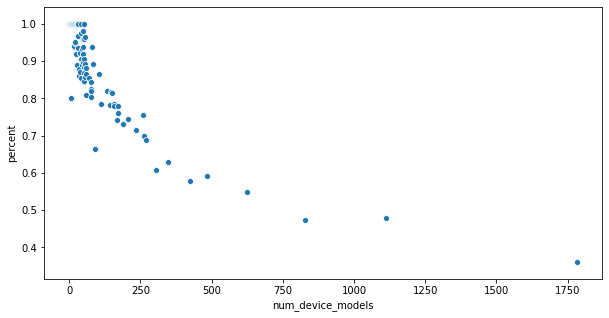

In [39]:
plt.figure(figsize=(10,5)) #чтобы не мучать глазки

sns.scatterplot(y = devices['percent'], 
                x = devices['num_device_models'], alpha = 1)

Видим, что это общая тенденция к снижению процента уникальных устройств с ростом количества устройств. Предположение не подтвердилось

Других внятных гипотез не надумал :/